In [1]:
import gymnasium as gym
import numpy as np

env = gym.make('FrozenLake-v1', is_slippery=False)

https://gymnasium.farama.org/environments/toy_text/frozen_lake/

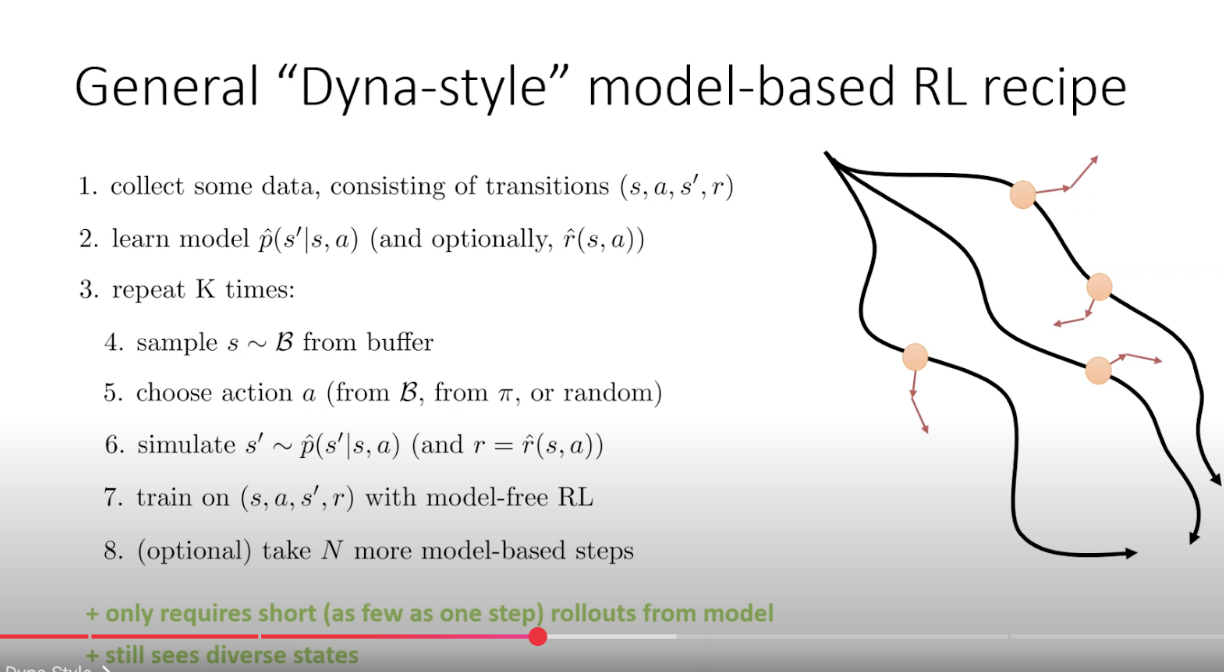

## 1- Generate Data

In [2]:

def generate_dataset(env, num_episodes):
    """
    Gera um conjunto de dados estruturado em episódios.

    Args:
        env: O ambiente OpenAI Gym.
        num_episodes: Número de episódios a serem gerados.

    Returns:
        episodes: Lista de episódios, onde cada episódio é uma lista de transições.
    """
    episodes = []

    for _ in range(num_episodes):
        state = env.reset()
        episode = []
        done = False
        truncated = False

        while not (done or truncated):
            action = env.action_space.sample()  # Ação aleatória
            next_state, reward, done, truncated, _ = env.step(action)

            if type(state) == tuple:  # Tratando estados que podem ser tuplas
                state = state[0]

            # Adicionar a transição ao episódio
            episode.append((state, int(action), reward, next_state))
            state = next_state

        # Adicionar o episódio à lista de episódios
        episodes.append(episode)

    return episodes

num_episodes = 100
episodes = generate_dataset(env, num_episodes)

# Exibindo informações sobre o conjunto de dados
print(f"Total de episódios gerados: {len(episodes)}")
print(f"Exemplo de transição no primeiro episódio: {episodes[0][1]}")  # Primeira transição do primeiro episódio
print(f"Tamanho do primeiro episódio: {len(episodes[0])}")
print(f"Exemplo de episódio: {episodes[0]}")

# Fechando o ambiente
env.close()

Total de episódios gerados: 100
Exemplo de transição no primeiro episódio: (0, 3, 0.0, 0)
Tamanho do primeiro episódio: 11
Exemplo de episódio: [(0, 0, 0.0, 0), (0, 3, 0.0, 0), (0, 1, 0.0, 4), (4, 0, 0.0, 4), (4, 1, 0.0, 8), (8, 3, 0.0, 4), (4, 0, 0.0, 4), (4, 1, 0.0, 8), (8, 2, 0.0, 9), (9, 1, 0.0, 13), (13, 0, 0.0, 12)]


## 2- Make models of the world

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [4]:
def prepare_dataset(episodes):
    """
    Prepara os dados para o modelo de transição.

    Args:
        episodes: Lista de episódios, onde cada episódio é uma lista de transições.

    Returns:
        X: Array de features (state, action).
        y: Array de alvos (next_state).
    """
    X = []
    y = []

    for episode in episodes:
        for transition in episode:
            state, action, reward, next_state = transition
            # Concatenar estado e ação como features
            X.append([state, action])
            # Definir next_state como alvo
            y.append(next_state)

    X = np.array(X)
    y = np.array(y)
    return X, y

X, y = prepare_dataset(episodes)

# Dividir o dataset em treino e teste usando os dados codificados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ----------------------- Treinamento do Modelo de Mundo -----------------------

# Treinar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)

# Prever e calcular a acurácia no conjunto de treino
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Acurácia no dataset de treino: {train_accuracy:.4f}")

# Prever e calcular a acurácia no conjunto de teste
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no dataset de teste: {test_accuracy:.4f}")

Acurácia no dataset de treino: 0.9762
Acurácia no dataset de teste: 0.9491


##
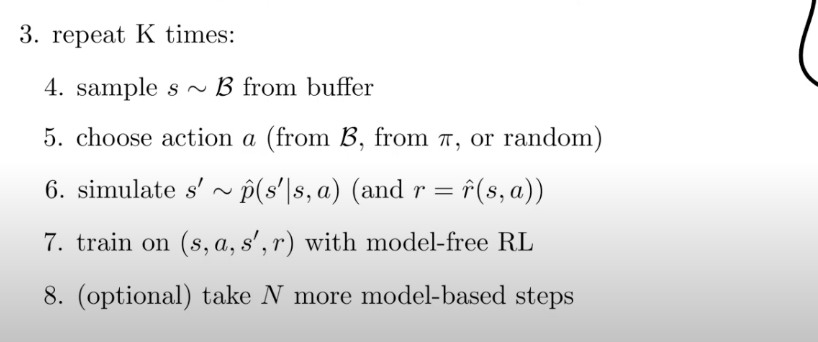

In [5]:
#Definimos a politica do modelo
import torch.nn as nn
import torch.optim as optim

policy = nn.Sequential(
    nn.Linear(2, 256),
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 4),
    nn.Sigmoid()
)
optimizer = optim.Adam(policy.parameters(), lr=1e-3)


In [52]:
import random

def random_state(episodes):
    random_episode = int(random.sample(range(len(episodes)),1)[0])
    random_transition = int(random.sample(range(len(episodes[random_episode])),1)[0])
    s_sampled = episodes[random_episode][random_transition][0]
    return s_sampled

K = 3

for i in range(K):
    state = random_state(episodes)
    action = env.action_space.sample()
    next_state = rf_model.predict([[state,action]])
    
    

[5]
[4]
[3]
